# Predicting Heart Disease

## Summary

### Introduction

Heart disease is an umbrella term that refers to several conditions that affect the health of one's heart. Common heart diseases include disease of the blood vessel, arrhythmia (irregular beating of the heart), disease of the heart valve and muscle, infection of the heart, and heart defects from birth (“Heart Disease.”). The symptoms of one’s  heart disease is very dependent on the type of disease they have, however many forms can be prevented with healthy lifestyle choices. Most heart diseases (with the exception of serious defects at birth) are only diagnosed after a heart attack, heart failure, or stroke (“Heart Disease.”).  Heart attacks, heart failure, and strokes are very traumatic events to go through and are oftentimes deadly (“Heart Disease and Stroke.”). Therefore it is very important that we are able to predict if an individual is at an increased risk of heart disease and try to get them preventable care. In this project we want to determine if we can predict if someone is at risk of a heart disease based on the following variables.

We used data from UCI Machine Learning (https://archive-beta.ics.uci.edu/ml/datasets/heart+disease). The Cleveland Heart Disease dataset consists of 13 explanatory variables and 1 target class. The variables, variable type and a brief description of each variable are listed below.

| Variable | Variable Type | Description |
| :-: | :-: | :-: |
| Age | Quantitative | Age of patient in years |
| Sex | Categorical | Sex of patient where 0 = female and 1 = male |
| Chest Pain | Categorical | Type of chest pain the patient has where 1 = typical angina, 2 = atypical angina, 3 = non-anginal, 4 = asymptomatic |
| Resting Blood Pressure | Quantitative | Resting blood pressure of the patient measured at admission to the hospital in mm Hg |
| Serum Cholesterol | Quantitative | Serum Cholesterol is the total amount of cholesterol a patient has in their blood. It is measured in mg/dl |
| Fasting Blood Sugar | Categorical | The blood sugar level of the patient after fasting where 0 if blood sugar is less than 120mg/dl and 1 otherwise |
| Resting ECG | Categorical | The results of the patients resting electrocardiographic where 0 = normal results, 1 = S-T wave abnormality, 2 = left ventricular hypertrophy |
| Max Heart Rate | Quantitative | The maximum heart rate that the patient had in bpm |
| Exercise Induced Angina | Categorical | If the patient has exercised induced angina (chest pain caused by reduced blood flow) where 0 = no and 1 =yes |
| Oldpeak | Quantitative | The ST depression (ECG measurement of the heart) a patient has induced by exercise relative to rest in mm
 |
| Slope | Categorical | The slope of peak exercise ST segment of patient where 1 = upsloping, 2 = flat, 3 = downsloping |
| Number of Major Blood Vessels | Quantitative | The number of major blood vessels |
| Thalassemia | Categorical | Occurrence of thalassemia in the patient (blood disorder that causes patient to have reduced amounts of hemoglobin) where 3 = normal, 6 = fixed defect, and 7 = reversible defect |
| Diagnosis | Categorical | Presence of heart disease in the patient from 0 to 4 where 0 indicates no presence of heart disease. This is the target column |


# Methods & Results

## Packages

In [6]:
library(tidyverse)

Load heart disease data set
https://archive-beta.ics.uci.edu/ml/datasets/heart+disease

In [9]:
heart_disease <- read.csv("data/processed-cleveland.csv", header = FALSE)

Added column headers

In [10]:
colnames(heart_disease) <- c("age",
                             "sex",
                             "chest_pain",
                             "resting_blood_pressure",
                             "serum_cholesterol",
                             "fasting_blood_sugar",
                             "resting_ecg",
                             "max_heart_rate",
                             "exercise_induced_angina",
                             "oldpeak",
                             "slope",
                             "num_of_major_vessels",
                             "thalassemia",
                             "diagnosis")

In [11]:
head(heart_disease, 10)

,age,sex,chest_pain,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,num_of_major_vessels,thalassemia,diagnosis
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
7,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
8,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
9,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


## Exploring DataSet

In [12]:
str(heart_disease) #get structure of dataset

'data.frame':	303 obs. of  14 variables:
 $ age                    : num  63 67 67 37 41 56 62 57 63 53 ...
 $ sex                    : num  1 1 1 1 0 1 0 0 1 1 ...
 $ chest_pain             : num  1 4 4 3 2 2 4 4 4 4 ...
 $ resting_blood_pressure : num  145 160 120 130 130 120 140 120 130 140 ...
 $ serum_cholesterol      : num  233 286 229 250 204 236 268 354 254 203 ...
 $ fasting_blood_sugar    : num  1 0 0 0 0 0 0 0 0 1 ...
 $ resting_ecg            : num  2 2 2 0 2 0 2 0 2 2 ...
 $ max_heart_rate         : num  150 108 129 187 172 178 160 163 147 155 ...
 $ exercise_induced_angina: num  0 1 1 0 0 0 0 1 0 1 ...
 $ oldpeak                : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope                  : num  3 2 2 3 1 1 3 1 2 3 ...
 $ num_of_major_vessels   : chr  "0.0" "3.0" "2.0" "0.0" ...
 $ thalassemia            : chr  "6.0" "3.0" "7.0" "3.0" ...
 $ diagnosis              : int  0 2 1 0 0 0 3 0 2 1 ...


In [13]:
summary(heart_disease) #summary

      age             sex           chest_pain    resting_blood_pressure
 Min.   :29.00   Min.   :0.0000   Min.   :1.000   Min.   : 94.0         
 1st Qu.:48.00   1st Qu.:0.0000   1st Qu.:3.000   1st Qu.:120.0         
 Median :56.00   Median :1.0000   Median :3.000   Median :130.0         
 Mean   :54.44   Mean   :0.6799   Mean   :3.158   Mean   :131.7         
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:4.000   3rd Qu.:140.0         
 Max.   :77.00   Max.   :1.0000   Max.   :4.000   Max.   :200.0         
 serum_cholesterol fasting_blood_sugar  resting_ecg     max_heart_rate 
 Min.   :126.0     Min.   :0.0000      Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0     1st Qu.:0.0000      1st Qu.:0.0000   1st Qu.:133.5  
 Median :241.0     Median :0.0000      Median :1.0000   Median :153.0  
 Mean   :246.7     Mean   :0.1485      Mean   :0.9901   Mean   :149.6  
 3rd Qu.:275.0     3rd Qu.:0.0000      3rd Qu.:2.0000   3rd Qu.:166.0  
 Max.   :564.0     Max.   :1.0000      Max.   :2.0000   M

We grouped the data by its diagnosis and graphed it in order for us to see if the dataset is balanced or not.

In [14]:
diagnosis_heart_disease <- group_by(heart_disease, diagnosis) %>%
                                count()
diagnosis_heart_disease

diagnosis,n
<int>,<int>
0,164
1,55
2,36
3,35
4,13


As we can see the data seems pretty unbalanced, however we should note that 0 indicates the absence of heart disease and 1-4 indicates the presence of heart disease, so we will turn the diagnosis into binary 0 or 1 (absent or present). We will also perform data cleaning to deal with NA values

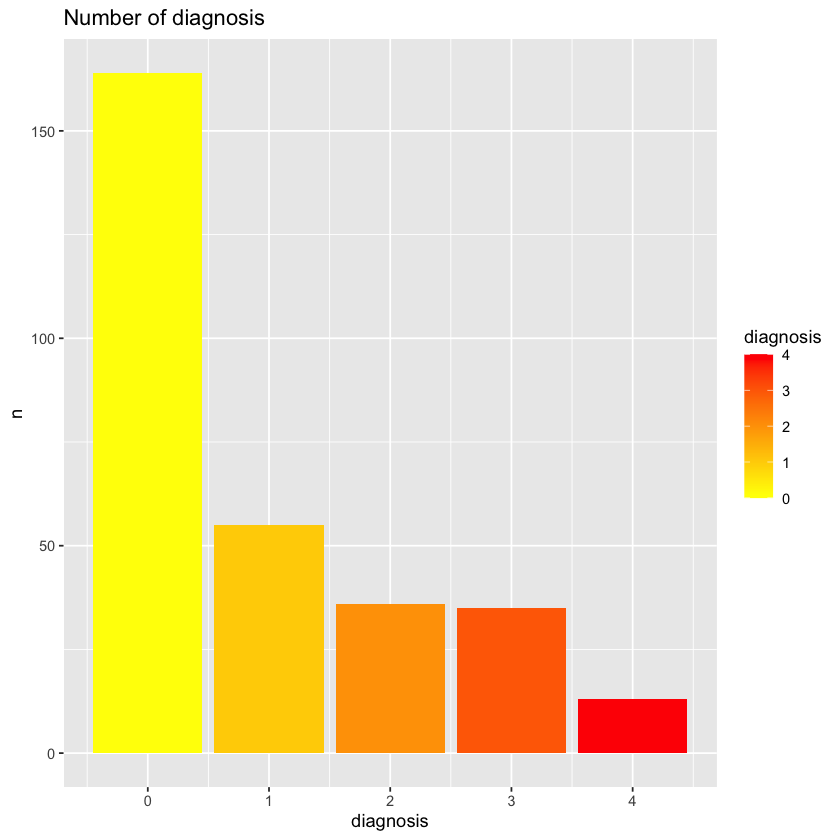

In [15]:
heart_bar <- ggplot(diagnosis_heart_disease, 
                    aes(x = diagnosis, 
                        y = n,
                        fill = diagnosis)) +
                    geom_bar(stat = "identity") +
                    ggtitle("Number of diagnosis") +
                    scale_fill_gradient(low = "yellow", high = "red", na.value = NA)

heart_bar